<a href="https://colab.research.google.com/github/ManethWijetunga/Covid19App/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 - SCS 3201**
Index No: 19001942

# **1) Multivariate Linear Regression**

**Selection and a brief introduction to the data sets**

---
The below data set was obtained from UCI ML Repository. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the ***temperature and humidity conditions*** around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. 

---



**The objective of regression task**

Experimental data are being used to create regression models of appliances energy use in a low energy building. To be specific, the energy use in Wh lights with changes in temperature, windspeed, humidity, visibility, etc.

**Data Preprocessing**

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importing the dataset from UCI
theDataset = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'

df = pd.read_csv(theDataset,header=None)

#filtering unwanted columns
df.drop(columns=[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], inplace=True, axis=1)

#Removing the header row
df = df.iloc[1:] 
df = df.astype(float) #Converting all values in the dataset to float

#Adding the bias column to the dataset
df = pd.concat([pd.Series(1, index=df.index, name="00"), df], axis=1)
#Printing the dataframe after pre-processing
df.head()

,00,2,21,22,23,24,25,26,27,28
1,1,30.0,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2,1,30.0,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
3,1,30.0,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
4,1,40.0,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
5,1,40.0,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
#Independent variable -> X 
X = df.drop(columns=2)

#Dependent variable -> y
y = df.iloc[:, 9]
y

1        13.275433
2        18.606195
3        28.642668
4        45.410389
5        10.084097
           ...    
19731    43.096812
19732    49.282940
19733    29.199117
19734     6.322784
19735    34.118851
Name: 28, Length: 19735, dtype: float64

**Data Normalizing** <br>

Dataset has been normalised by dividing each value in a given column by the maximum value of that selected column.

In [ ]:
#Normalizing of features
for i in X.columns:
  maxValue = max(X[i])
  X[i] /= maxValue

**Splitting the dataset** <br>
Dataset is splitted into two portions. One portion would include the test data set and the other would include the training data set. *Sklearn library is been used for this purpose.*

In [ ]:
#splitting data into two sets as traindata and testdata 
from sklearn.model_selection import train_test_split

#40% of the whole dataset is taken as the test data and the other 60% as the train data randomly
X_traindata, X_testdata, y_traindata, y_testdata = train_test_split(X, y, test_size = 0.4, random_state = 69) 

In [ ]:
#Initialized theta variables to random values
theta = np.random.randint(100, size=(len(X.columns)))

**Cost function** 

In [ ]:
def costFunction(X, y, theta, N):

    #hypothesis
    hx = theta*X  
    hx = np.sum(hx, axis=1)

    finalCost = np.sum((hx-y)**2)/(2*N)

    return finalCost

**Gradient Descent Algorithm**

In [ ]:
def gradientDescent(X, y, theta, learningRate, iterationsAmount,N):

    #An array to record the cost at each itertion of the algorithm
    stepwiseCosts = [] 
    while (iterationsAmount>0): 

        #hypothesis   
        hx = theta*X  
        hx = np.sum(hx, axis=1) 
        
        #Updating all the theta values
        for j in range(0, len(X.columns)):
            theta[j] = theta[j] - (learningRate/N)*(sum((hx-y)*X.iloc[:,j]))

        #recording cost at each itertion to the above array
        stepwiseCosts.append(costFunction(X, y, theta,N)) 
        iterationsAmount-=1

    return stepwiseCosts, theta

**Model fitting and plotting the convergence**

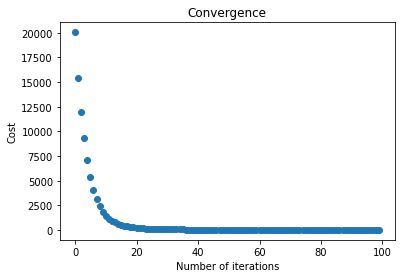

In [ ]:
#Model configurations
learningRate = 0.05
iterationsAmount = 100
#Number of datapoints
N = float(len(df)) 

#Training the multivariate linear regression model
stepwiseCosts, theta = gradientDescent(X_traindata, y_traindata, theta, learningRate, iterationsAmount,N)

#Plotting convergence
plt.figure()
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Convergence')
plt.scatter(x=list(range(0, iterationsAmount)), y=stepwiseCosts)
plt.show()

**Evaluation - Testing Model Accuracy**

In [ ]:
#Testing the accuracy of model

#hypothesis 
predicted_Y_values = theta*X_testdata 
predicted_Y_values = np.sum(predicted_Y_values, axis=1) 

from sklearn.metrics import r2_score
print('The r2 score is: ',r2_score(y_testdata,predicted_Y_values))

The r2 score is:  0.93472941308061


# **2) Logistic Regression**

**Selection and a brief introduction to the data sets**

---
The below data set was obtained from UCI ML Repository. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


***Attribute Information:***

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

---



**The objective of classification task**

Categorising bank notes as forged notes and real notes by considering features such as variance, skewness, curtosis and entropy of Wavelet image.

**Data Preprocessing**

In [87]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
theDataset = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'

df = pd.read_csv(theDataset,header=None)

df.tail()

,0,1,2,3,4
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [114]:
#Independent variable -> X 
X = df.drop(columns=3)

#Dependent variable -> y
y = df.iloc[:, 4]
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: 4, Length: 1372, dtype: int64

**Data Normalizing** 

Dataset has been normalised by dividing each value in a given column by the maximum value of that selected column.

In [115]:
#Normalizing of features
for i in X.columns:
  maxValue = max(X[i])
  X[i] /= maxValue

**Model fitting**

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#40% of the whole dataset is taken as the test data and the other 60% as the train data randomly
X_traindata, X_testdata, y_traindata, y_testdata = train_test_split(X, y, test_size=0.4, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_traindata, y_traindata)

LogisticRegression()

**Evaluation**

In [118]:
y_prediction = logreg.predict(X_testdata)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_testdata, y_testdata)))

Accuracy of logistic regression classifier on test set: 1.00
